# Anemia Classification

`The aim of this project to determine if a patient with the condition CKD(Chronic Kidney Disease) stage-3 or higher, have a risk of Anemia or not.`

- Datasource: [NHANES](https://wwwn.cdc.gov/nchs/nhanes/) 

- [What is CKD(Chronic Kidney Disease)?](https://www.kidney.org/atoz/content/about-chronic-kidney-disease)
- [How are Anemia and CKD related?](https://www.niddk.nih.gov/health-information/kidney-disease/anemia)

* ` The following variables are extracted from the NHANES data `

In [ ]:
"""
+--------------+-------------------------------------------------------------------------------------------------------+
| Feature Name |                                          Feature Description                                          |
+--------------+-------------------------------------------------------------------------------------------------------+
|    bpq020    |                                    high blood pressure ? 1:Yes 0:No                                   |
|    bpq080    |                                  high cholesterol level ? 1:Yes 0:No                                  |
|    diq010    |                                       have diabetes? 1:Yes 0:No                                       |
|     gfr      |                                               eGFR value                                              |
|    huq010    |                   General health condition? 1: Excellent 2: Very good 3: Fair 4: Poor                 |
|    huq071    |                           Overnight hospital patient in last year? 1:Yes 0:No                         |
|    lbxhgb    |                                           Hemoglobin (g/dL)                                           |
|    lbxsca    |                                         Total Calcium (mg/dL)                                         |
|    lbxsch    |                                Cholesterol, refrigerated serum (mg/dL)                                |
|   lbxsclsi   |                                           Chloride (mmol/L)                                           |
|    lbxscr    |                                 Creatinine, refrigerated serum (mg/dL)                                |
|    lbxsgl    |                                  Glucose, refrigerated serum (mg/dL)                                  |
|   lbxsgtsi   |                                 Gamma Glutamyl Transferase (GGT) (U/L)                                |
|    lbxsir    |                                    Iron, refrigerated serum (ug/dL)                                   |
|   lbxsksi    |                                           Potassium (mmol/L)                                          |
|   lbxsldsi   |                                   Lactate Dehydrogenase (LDH) (U/L)                                   |
|   lbxsnasi   |                                            Sodium (mmol/L)                                            |
|    lbxsph    |                                           Phosphorus (mg/dL)                                          |
|    lbxstb    |                                        Total Bilirubin (mg/dL)                                        |
|    lbxstp    |                                          Total Protein (g/dL)                                         |
|    lbxstr    |                                  Triglycerides, refrig serum (mg/dL)                                  |
|    lbxsua    |                                           Uric Acid (mg/dL)                                           |
|    lbxcrp    |                                       C-reactive protein (mg/dL)                                      |
|   lbdb12si   |                                      Vitamin B12, serum (pmol/L)                                      |
|   mcq160b    |                                 congestive heart failure ? 1:Yes 0:No                                 |
|   mcq160c    |                                  coronary heart disease ? 1:Yes 0:No                                  |
|   mcq160d    |                                  angina/angina pectoris? 1:Yes 0:No                                   |
|   mcq160e    |                                       heart attack ? 1:Yes 0:No                                       |
|   mcq160f    |                                       had a stroke ? 1:Yes 0:No                                       |
|   mcq160l    |                                    any liver condition ? 1:Yes 0:No                                   |
|   riagendr   |                                         Gender ? 1:Male 0:Female                                      |
|   ridageyr   |                                       Age in years at screening                                       |
|   ridreth1   | Race? 1: Mexican Americanc 2: Other Hispanic 3: Non-Hispanic White 4: Non-Hispanic Black 5: Other Race|
+--------------+-------------------------------------------------------------------------------------------------------+

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno
import warnings

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve,auc
from sklearn2pmml.decoration import ContinuousDomain, CategoricalDomain
from sklearn2pmml.preprocessing import PMMLLabelBinarizer
from sklearn.preprocessing import Imputer
from sklearn_pandas import DataFrameMapper, CategoricalImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from scikitplot.metrics import plot_roc_curve

In [4]:
warnings.filterwarnings("ignore")

### Data Cleaning

In [5]:
data = pd.read_csv('nhanes_data.csv')

In [6]:
data.columns

Index(['seqn', 'diq010', 'lbxhgb', 'bpq020', 'bpq080', 'riagendr', 'ridageyr',
       'ridreth1', 'huq071', 'huq010', 'mcq160l', 'mcq160b', 'mcq160c',
       'mcq160d', 'mcq160e', 'mcq160f', 'lbxsca', 'lbxsch', 'lbxscr',
       'lbxsgtsi', 'lbxsgl', 'lbxsir', 'lbxsldsi', 'lbxsph', 'lbxstb',
       'lbxstp', 'lbxsua', 'lbxsnasi', 'lbxsksi', 'lbxsclsi', 'lbxstr'],
      dtype='object')

In [7]:
data.head()

,seqn,diq010,lbxhgb,bpq020,bpq080,riagendr,ridageyr,ridreth1,huq071,huq010,...,lbxsir,lbxsldsi,lbxsph,lbxstb,lbxstp,lbxsua,lbxsnasi,lbxsksi,lbxsclsi,lbxstr
0,77.0,2.0,16.5,2.0,NaN,1.0,25.0,3.0,2.0,1.0,...,89.0,133.0,3.3,0.6,7.6,5.9,136.4,4.39,100.5,191.0
1,107.0,2.0,13.4,2.0,2.0,2.0,30.0,1.0,2.0,3.0,...,38.0,107.0,3.3,0.3,7.2,3.9,140.0,3.96,104.6,43.0
2,150.0,2.0,15.0,2.0,NaN,1.0,65.0,3.0,1.0,3.0,...,109.0,152.0,2.7,0.4,7.4,7.1,140.7,4.27,103.8,166.0
3,195.0,2.0,NaN,1.0,NaN,2.0,64.0,4.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,225.0,2.0,13.0,1.0,2.0,1.0,79.0,3.0,2.0,4.0,...,85.0,148.0,3.3,0.5,7.0,6.1,139.9,4.59,105.3,81.0


In [8]:
binary_columns = ['diq010', 'bpq020', 'bpq080', 'riagendr', 'huq071','mcq160l', 'mcq160b', 'mcq160c',
                  'mcq160d', 'mcq160e', 'mcq160f']
categorical_columns = ['ridreth1', 'huq010']

# Convert string data to numeric values
data = data.apply(pd.to_numeric, downcast='integer')

# 1: Yes
# 2: No
def to_binary(value):
    if value == 1:
        return 1
    if value == 2:
        return 0
    return np.nan

for col in binary_columns:
        data[col] = data[col].apply(to_binary)

for col in categorical_columns:
    data[col] = data[col].replace(9, np.nan)
    data[col] = data[col].replace(7, np.nan)

# data.dropna(inplace=True)
data = data.apply(pd.to_numeric, downcast='integer')
data = data.sort_values(by='seqn', axis=0)

In [9]:
# droping rows missing hemoglobin
data = data[data.lbxhgb.notna()]
data_shape_hgb_notnull = data.shape

# droping rows missing cretanine
data = data[data.lbxscr.notna()]
data_shape_hgb_crt_notnull =  data.shape

* Formula 
`GFR = 175 x (Standardized SCr) -1.154 x (age)-0.203 x (0.742 if female) x (1.210 if African American)`
  * [Source](https://ukidney.com/nephrology-resources/egfr-calculator) 

In [10]:
def get_gfr(row):
    creatinine = max(0.3, row['lbxscr'])
    age = max(1, row['ridageyr'])
    gender = 0.742 if row['riagendr'] == 0 else 1
    race = 1.210 if row['ridreth1'] == 4 else 1
    
    gfr = 175 * creatinine**(-1.154) * age**(-0.203) * gender * race
    return gfr

In [11]:
data['gfr'] = data.apply(get_gfr, axis=1)

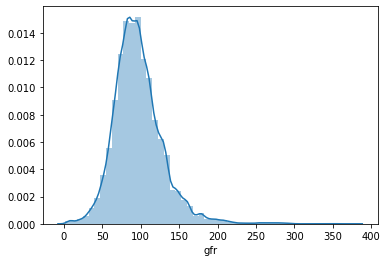

In [12]:
sns.distplot(data.gfr)
plt.show()

In [13]:
data = data[data.gfr < 60]
ckd_patients = data.shape
total_ckd_data = len(data)

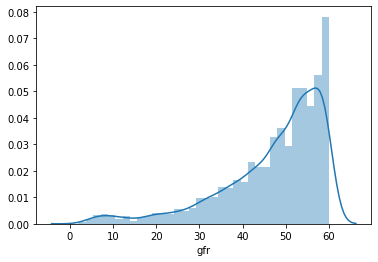

In [14]:
sns.distplot(data.gfr);

###### The diagnosis of anemia in men is based on a hemoglobin of less than 130 to 140 g/L (13 to 14 g/dL); in women, it is less than 120 to 130 g/L (12 to 13 g/dL).
###### Source: [Wiki](https://www.wikiwand.com/en/Anemia)

In [15]:
# making target variable(Anemic or non-Anemic) according to age, gender and hemoglobin level.
def target_generator(frame):
    if ((frame['ridageyr']>15) & (frame['riagendr']==1) & (frame['lbxhgb']<13.0)):
        return 1
    elif ((frame['ridageyr']>15) & (frame['riagendr']==0) & (frame['lbxhgb']<12.0)):
        return 1
    else:
        return 0

In [16]:
data['target'] = data.apply(target_generator, axis=1)

In [17]:
X = data.drop(['seqn', 'lbxhgb', 'target'], axis=1)
y = data['target']

In [18]:
y.value_counts() / len(y)

0    0.766606
1    0.233394
Name: target, dtype: float64

In [19]:
X.columns

Index(['diq010', 'bpq020', 'bpq080', 'riagendr', 'ridageyr', 'ridreth1',
       'huq071', 'huq010', 'mcq160l', 'mcq160b', 'mcq160c', 'mcq160d',
       'mcq160e', 'mcq160f', 'lbxsca', 'lbxsch', 'lbxscr', 'lbxsgtsi',
       'lbxsgl', 'lbxsir', 'lbxsldsi', 'lbxsph', 'lbxstb', 'lbxstp', 'lbxsua',
       'lbxsnasi', 'lbxsksi', 'lbxsclsi', 'lbxstr', 'gfr'],
      dtype='object')

* Visualizing missing values

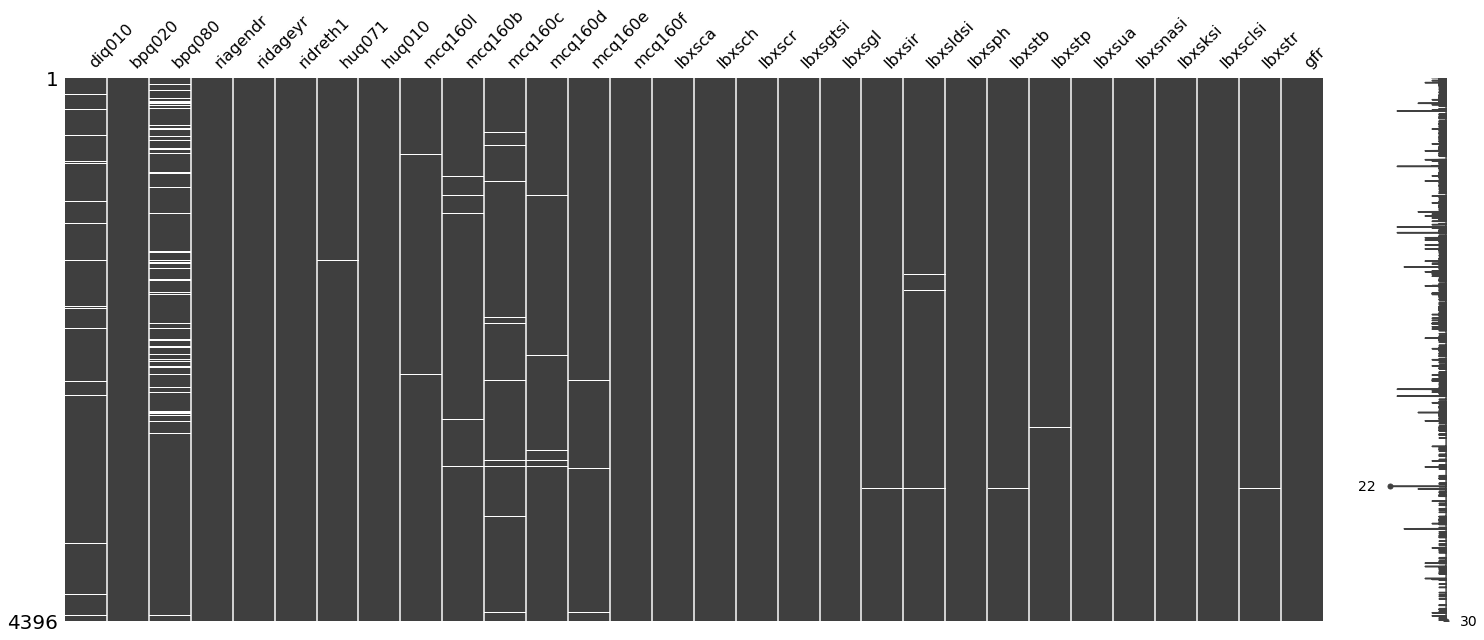

In [22]:
missingno.matrix(X)

In [23]:
# Defining columns maps on how to treat categorical features, missing data
# Imputing missing categorical values with mode, and missing continuous values with median

column_maps = []
for col in X.columns:
    if (col in binary_columns) or (col in categorical_columns):
        column_maps.append((col, [CategoricalDomain(missing_value_treatment="as_mode", invalid_value_treatment="as_missing"), CategoricalImputer(), PMMLLabelBinarizer()]))
    else:
        column_maps.append(([col], [ContinuousDomain(missing_value_treatment='as_median', invalid_value_treatment="as_missing"), Imputer(strategy='median')]))

In [24]:
seed=52
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True ,test_size=0.3,  stratify=y, random_state=seed)

In [25]:
%%time

#Using pipeline to preprocess and create the model
clf = Pipeline([
        ('mapper', DataFrameMapper(column_maps)), # Imputation of missing values and One-Hot-Encoding of features
        ('std', StandardScaler()),                # Normalization of data
        ('clf', LogisticRegression())             # Model
])

search_space = [
    {
        'clf': [LogisticRegression(random_state=seed)],
        'clf__class_weight': [None, 'balanced'],
        'clf__penalty': ['l1', 'l2'],
        'clf__C': 10.0**np.arange(-4, 5)
    },
    {
        'clf': [DecisionTreeClassifier(random_state=seed)],
        'clf__class_weight': [None, 'balanced'],
        'clf__max_depth': np.arange(3, 10, 3)
    },
    {
        'clf': [RandomForestClassifier(random_state=seed)],
        'clf__class_weight': [None, 'balanced'],
        'clf__max_depth': np.arange(3, 10, 3),
        'clf__n_estimators': np.arange(10, 200, 20)
    },
    {
        'clf': [XGBClassifier(random_state=seed)],
        'clf__n_estimators': np.arange(50, 500, 50),
        'clf__max_depth': np.arange(3, 10, 3),
    }
]

grid_search = GridSearchCV(clf, search_space, cv=5, scoring='roc_auc', return_train_score=False, n_jobs=4)
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_
print(best_clf)

Pipeline(memory=None,
         steps=[('mapper',
                 DataFrameMapper(default=False, df_out=False,
                                 features=[('diq010',
                                            [CategoricalDomain(invalid_value_replacement=None,
                                                               invalid_value_treatment='as_missing',
                                                               missing_value_replacement=None,
                                                               missing_value_treatment='as_mode',
                                                               missing_values=None,
                                                               with_data=True,
                                                               with_statistics=True),
                                             CategoricalImputer(copy=True,
                                                                fill_value=...
                 XGBClassifier(base_score=0

In [26]:
train_proba  = best_clf.predict_proba(X_train)
test_proba = best_clf.predict_proba(X_test)

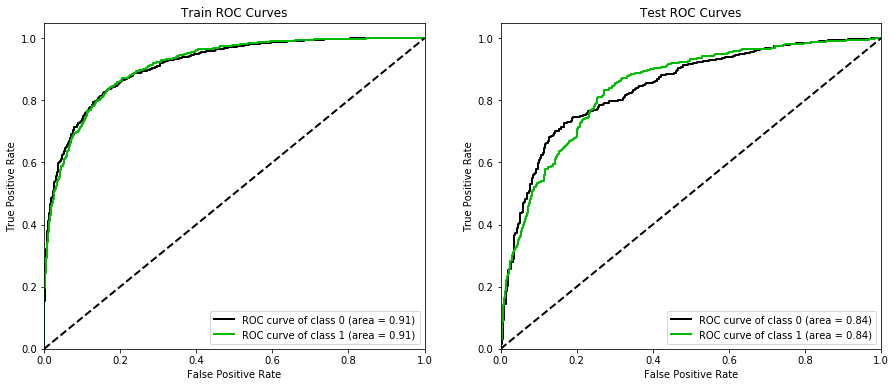

In [27]:
fig,(ax1,ax2) = plt.subplots(figsize=(15,6),ncols=2)
plot_roc_curve(y_train, train_proba, curves='each_class', title='Train ROC Curves', ax=ax1)
plot_roc_curve(y_test, test_proba, curves='each_class', title='Test ROC Curves', ax=ax2)
plt.show()

### Picking the important features picked by the model

In [28]:
feature_names = np.array(best_clf.named_steps['mapper'].transformed_names_)
feature_weights = best_clf.named_steps['clf'].feature_importances_

In [29]:
feature_desc=pd.read_pickle('feature_descriptions.pkl')

In [30]:
feature_names_ = []
for name in feature_names:
    if '_' in name:
        key, num = name.split('_')
        value = feature_desc[key].split('?')[0]
        feature_names_.append(value.strip()+"_"+num)
    else: feature_names_.append(feature_desc[name])

In [31]:
feature_imp = pd.DataFrame([feature_names_, feature_weights]).T

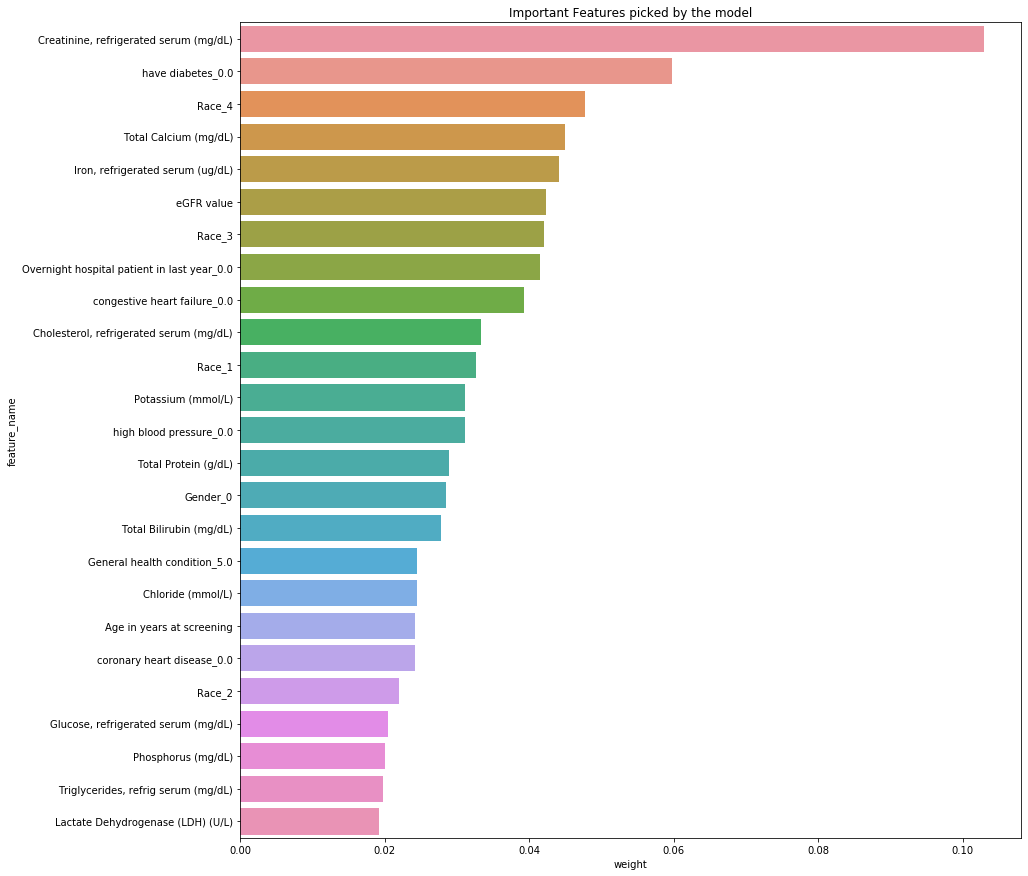

In [32]:
feature_imp.columns = ['feature_name', 'weight']
feature_imp.sort_values(by='weight',ascending=False, inplace=True)
top_features = feature_imp.head(25)
fig, ax = plt.subplots(figsize=(14,15))
sns.barplot(y='feature_name',x='weight',data=top_features, ax=ax)
ax.set_title('Important Features picked by the model')
plt.show()

* From the above features picked by the model, `creatinine`, `diabetes`, `race`, `calcium` and `iron` content in the body, `eGFR` are the most important factors to determine the risk of Anemia for a patient